In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
datadir = '../resources/'
image = cv2.cvtColor(cv2.imread(datadir+'result_img.jpg'), cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(cv2.imread(datadir+'merchandise/fish.jpg'), cv2.COLOR_BGR2GRAY)

In [226]:
def single_match(template, image):
    result = cv2.matchTemplate(image, template,
        cv2.TM_CCOEFF_NORMED)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)
    return maxLoc

In [227]:
pivot = single_match(template, image)

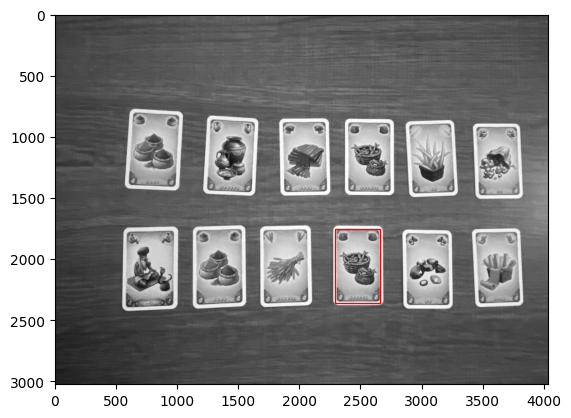

In [228]:
# Visualization
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')
rect = patches.Rectangle((pivot[0], pivot[1]), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

In [229]:
def match_helper(template, image, threshold):
    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    (yCoords, xCoords) = np.where(result >= threshold)
    return zip(xCoords, yCoords)

In [230]:
# We will implement non-maximum suppression in future
def remove_duplicate(coords_zip, threshold):
    coords_dict = set()
    for (x,y) in coords_zip:
        flag = True
        for (cx, cy) in coords_dict:
            if np.linalg.norm(np.array((x,y)) - np.array((cx, cy))) < threshold:
                flag = False
        if flag:
            coords_dict.add((x, y))
    return coords_dict

In [231]:
def multiple_match(template, image):
    return remove_duplicate(match_helper(template, image, 0.7), 250)

In [232]:
res = multiple_match(template, image)

2383 855
2292 1737


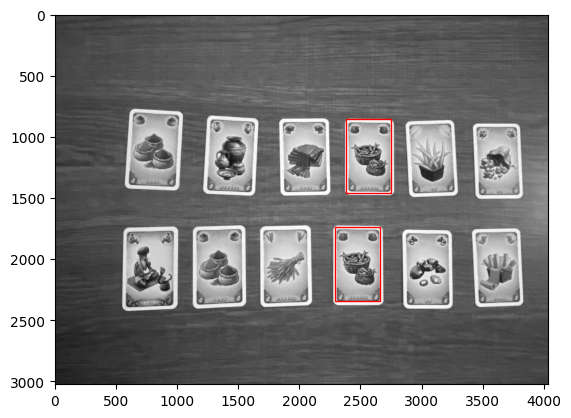

In [233]:
# Visualization
fig, ax = plt.subplots()

ax.imshow(image, cmap='gray')
for (x, y) in res:
    print(x,y)
    rect = patches.Rectangle((x, y), template.shape[1], template.shape[0], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [234]:
print(len(res))

2


In [8]:
image = cv2.cvtColor(cv2.imread(datadir+'board_clean.jpg'), cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(cv2.imread(datadir+'board_fin.jpg'), cv2.COLOR_BGR2RGB)

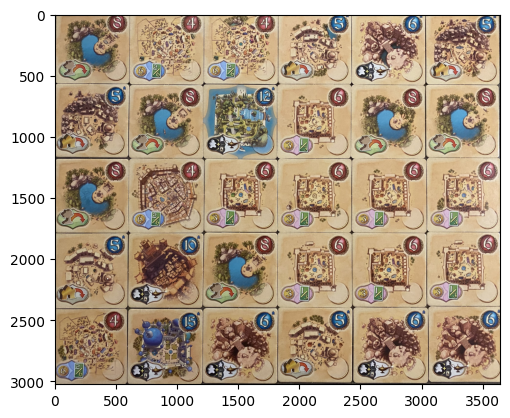

In [9]:
plt.imshow(image)

In [21]:
image.shape

(3024, 3640, 3)

In [22]:
def getModImg(orig):
    new_img = np.zeros((int(orig.shape[0]/2), int(orig.shape[1]/2), 3))
    slope = int(orig.shape[0]/10)
    for i in range(0,5):
        for j in range(0,6):
            new_img[i*slope: i*slope+slope, j*slope: j*slope+slope] = \
            orig[i*int(orig.shape[0]/5)+slope: i*int(orig.shape[0]/5)+slope+slope,
                    j*int(orig.shape[1]/6)+slope: j*int(orig.shape[1]/6)+slope+slope]
    return new_img

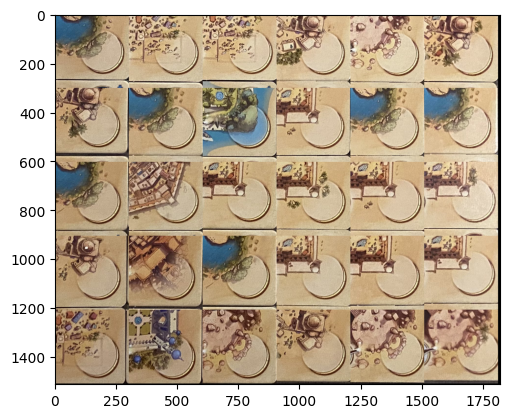

In [23]:
plt.imshow(getModImg(image)/255)

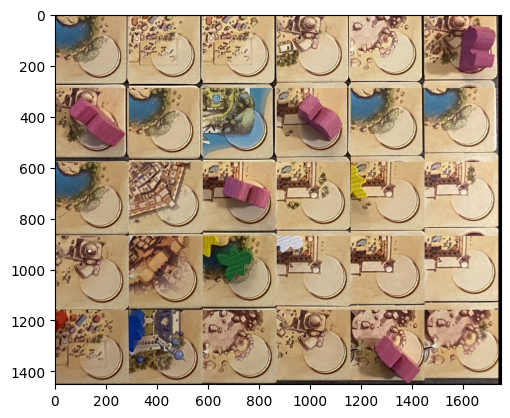

In [24]:
plt.imshow(getModImg(template)/255)